# Model, predict and solve the problem.

Modeling data before training a machine learning (ML) model is crucial for various reasons. It involves understanding the data's characteristics, which aids in identifying potential issues and assessing its suitability for the ML task. Additionally, data modeling enables preprocessing steps like handling missing values, outlier detection, and feature scaling, which enhance data quality. Through feature engineering, new features can be created or existing ones transformed to improve the model's performance. Dimensionality reduction techniques reduce the number of features, improving efficiency and preventing overfitting. Modeling data facilitates model selection based on data characteristics and requirements. Finally, data modeling enables evaluation and validation, ensuring the model's reliability and generalization capabilities before deployment. Overall, data modeling is fundamental for optimizing data, improving model performance, and facilitating informed decision-making in ML.

## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv('../data/modeling-data.csv')

## Feature Engineering
Feature engineering is a fundamental process of transforming raw data to make it more suitable for machine learning algorithms. Its purpose is to select, create, and modify features (input variables) to enhance the performance of a machine learning model.

### Cardinality
The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable gender the categories are male and female, whereas in the variable city the labels could be London, Manchester, Brighton, and so on.

Categorical variables can contain different numbers of categories. The variable "gender" contains only 2 labels, but a variable like "city" or "postcode" can contain a huge number of labels.

The number of different labels is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality poses the following challenges:

- Variables with too many labels tend to dominate those with only a few labels, particularly in decision tree-based algorithms.
- High cardinality may introduce noise.
- Some of the labels may only be present in the training data set and not in the test set, so machine learning algorithms may over-fit to the training set.
- Some labels may appear only in the test set, leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

let's check cardinality of the Categorical Features.

In [3]:
for feature in data.select_dtypes(include = 'O').columns:

        print(f'{feature}: {data[feature].nunique()}')

print()
print(f"data len: {data.shape[0]}")

Weatherconditions: 6
Road_traffic_density: 4
Type_of_order: 4
Type_of_vehicle: 2
Festival: 2
City: 3
Order_Day: 7
TypeOfMeal: 3

data len: 43862


### Rare Labels

Categorical variables are those whose values are selected from a group of categories, also called labels. Labels may have different frequencies. Some categories appear a lot in the dataset, some others appear only in a small number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like "New York" may appear a lot in the data because New York has a huge population, whereas smaller towns like "Leavenworth" will appear only on a few occasions (population ~2000 people), because the population there is very small. A borrower is more likely to live in New York than in any other city because it has a bigger population.

More specifically,

- Rare categories can cause over-fitting, particularly in tree-based methods.

- Infrequent labels may add noise, which could cause over-fitting.

- Rare labels may be present only in training set, therefore causing over-fitting.

- Rare labels may appear only in the test set. Thus, the ML model will not know how to evaluate it.

**Note:** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we should not to ignore it.

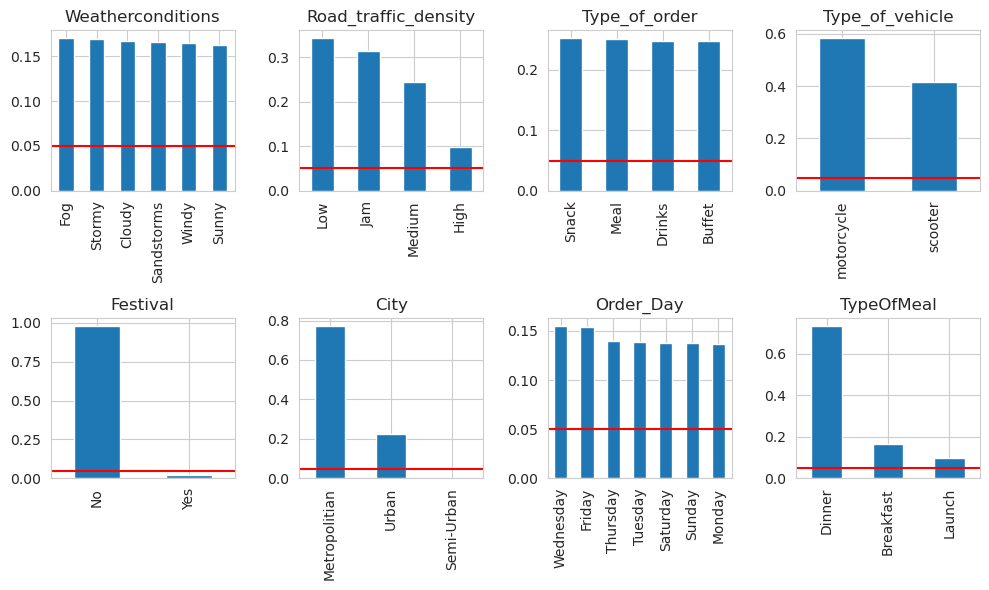

In [4]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols = 4, nrows = 2, figsize = (10, 6))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# For each categorical variable
for ax, feature in enumerate(data.select_dtypes(include = 'O').columns):

    pd.Series(data[feature].value_counts() / len(data)).sort_values(ascending = False).plot(kind = 'bar', ax = axes[ax])
    axes[ax].set_title(feature)
    axes[ax].axhline(y = 0.05, color = 'red')

plt.tight_layout()

**Festival**

In [5]:
data = data.drop('Festival', axis = 1)

**City**

In [6]:
data['City'] = data['City'].apply(lambda value: 'Urban' if value == 'Semi-Urban' else value)

### Data transformations

In [7]:
import scipy.stats as stats

In [8]:
ContinuousFeatures = data.drop(['Vehicle_condition', 'multiple_deliveries',
                               'OrderTime', 'Delivery_person_Age', 'Time_taken(min)'], axis = 1).select_dtypes(exclude = 'O').columns

ContinuousFeatures

Index(['Delivery_person_Ratings', 'DeliveryDistance'], dtype='object')

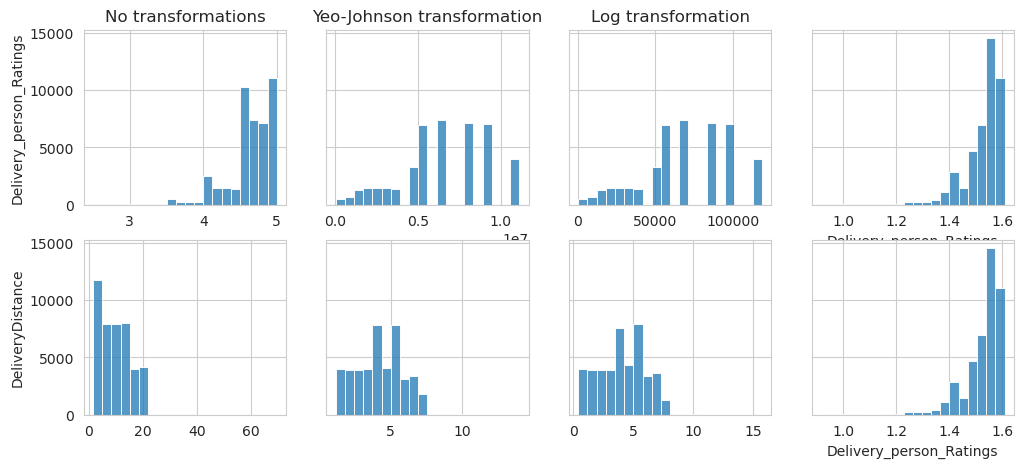

In [9]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols = 4, nrows = 2, figsize = (12, 5), sharey = True)

# Distribution with no transformations
sns.histplot(data = data, x = ContinuousFeatures[0], ax = ax1, bins = 20)
sns.histplot(data = data, x = ContinuousFeatures[1], ax = ax5, bins = 20)
ax1.set_title('No transformations')
ax1.set_xlabel('')
ax5.set_xlabel('')
ax1.set_ylabel(ContinuousFeatures[0])
ax5.set_ylabel(ContinuousFeatures[1])

# Yeo-Johnson transformation
temp1, param1 = stats.yeojohnson(data[ContinuousFeatures[0]].astype('float'))
temp2, param2 = stats.yeojohnson(data[ContinuousFeatures[1]].astype('float'))
sns.histplot(temp1, ax = ax2, bins = 20)
sns.histplot(temp2, ax = ax6, bins = 20)
ax2.set_title('Yeo-Johnson transformation')
ax2.set_xlabel('')
ax6.set_xlabel('')

# Box-Cox transformation
temp3, param3 = stats.boxcox(data[ContinuousFeatures[0]].astype('float'))
temp4, param4 = stats.boxcox(data[ContinuousFeatures[1]].astype('float'))
sns.histplot(temp3, ax = ax3, bins = 20)
sns.histplot(temp4, ax = ax7, bins = 20)
ax3.set_title('Box-Cox transformation')
ax3.set_xlabel('')
ax7.set_xlabel('')

# Log transformation
sns.histplot(np.log(data[ContinuousFeatures[0]]), ax = ax4, bins = 20)
sns.histplot(np.log(data[ContinuousFeatures[0]]), ax = ax8, bins = 20)
ax3.set_title('Log transformation')
ax3.set_xlabel('')
ax7.set_xlabel('');

### Feature Encoding
feature encoding is important to convert non-numeric data into a numerical representation that machine learning algorithms can process. It ensures algorithm compatibility, preserves relevant information, reduces dimensionality, handles non-numeric data, and ultimately improves model performance.

There is too many Encoding techniques: OneHot, Ordinal, Frequency, Ordered, Mean, Weight of evidence, etc... It's worth noting that there is no one-size-fits-all encoding method, and the choice of encoding technique depends on the specific characteristics of the data, the machine learning algorithms being used, and the goals of the analysis. It is often helpful to experiment with different encoding approaches and evaluate their impact on the model's performance before deciding which one is most suitable for a particular classification problem.

For this particular case I have decided to use: **OneHot Encoding**.

In [10]:
data.drop('Time_taken(min)', axis = 1).columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'City', 'Order_Day',
       'DeliveryDistance', 'OrderTime', 'TypeOfMeal'],
      dtype='object')

In [11]:
data = pd.get_dummies(data, drop_first = True)

### X, y

You can think of X as the input data, and y as the corresponding output or target values that you are trying to predict or model using machine learning algorithms. The goal is to learn a function or a relationship between X and y, so that given new input data, the model can make accurate prediction.

In [12]:
# Reseting Index

data.reset_index(drop = True, inplace = True)

In [13]:
X = data.drop('Time_taken(min)', axis = 1)
y = data['Time_taken(min)']

**Feature engineering notes:**

-  Cardinality in all categorical variables is controlled, being order_day the feature with more cardinality (7)
-  City and Festival both had a label that only appeared few times (Festival: Yes, City Semi-Urban) For festival I decided to remove the entire feature from the training dataset, since deliting "Yes" mean that there will be only "No" in the variable, this means having no predicting value. For city I decided to map those Semi-Urban as Urban.
-  There is no transformations that can be applied really satisfies the normal distribution so linear models need to be avoided.
-  Data was encoded using OneHot encoding since this is a regression problem.


## Performance & Error Metrics

Using performance and error metrics is essential for evaluating machine learning models. These metrics provide a quantitative assessment of model performance, aiding in model selection and hyperparameter tuning. They help detect overfitting or underfitting and enable performance monitoring over time. Metrics also play a crucial role in decision-making processes, allowing stakeholders to assess the feasibility and effectiveness of deploying ML models in real-world settings. Performance and error metrics provide a systematic and objective approach to evaluate and optimize ML models for optimal performance and decision-making.

The metrics I am gonna take into consideration are:

- **Mean Squared Error (MSE):** MSE is a common metric used to measure the average squared difference between the predicted and actual values in regression problems. It quantifies the overall quality of a regression model by assessing how closely its predictions align with the true values.

- **Root Mean Squared Error (RMSE):** RMSE is a commonly used evaluation metric in regression problems. It is derived from the Mean Squared Error (MSE) and provides a measure of the average magnitude of the prediction errors made by a regression model. To calculate RMSE, you take the square root of the MSE.
- **Mean Absolute Error (MAE):** MAE provides a measure of the average magnitude of the prediction errors made by the model. Unlike MSE and RMSE, which involve squaring the errors, MAE considers the absolute differences, which makes it less sensitive to outliers or instances with larger errors. The advantage of MAE is its simplicity and ease of interpretation. It represents the average absolute deviation from the true values and is expressed in the same units as the target variable.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
def GetMetrics(y, predictions):
    return {'MSE' : mean_squared_error(y, predictions),
            'RMSE' : np.sqrt(mean_squared_error(y, predictions)),
            'MAE': mean_absolute_error(y, predictions)}

## Model Selection

For this particular problem I have chosen to use a LSTM NN. A Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that is widely used for processing sequential and time series data. LSTMs are designed to overcome the limitations of traditional RNNs in capturing long-term dependencies and preserving information over longer sequences.

LSTMs are particularly effective in tasks where there are time dependencies and contextual information matters. They have been successfully applied in various domains, including natural language processing, speech recognition, machine translation, and time series forecasting.

The key feature of an LSTM is its memory cell, which allows it to selectively remember or forget information over time. It consists of several gates that control the flow of information:

- **Forget Gate:** Determines which information to discard from the previous cell state.
- **Input Gate:** Decides which new information to update and add to the cell state.
- **Output Gate:** Filters the information from the current cell state to produce the output.
The LSTM's ability to selectively retain or discard information through these gates enables it to capture long-term dependencies and handle vanishing or exploding gradients during training.

LSTMs are trained using backpropagation through time (BPTT), an extension of backpropagation where the gradient is calculated across time steps. This allows the network to learn and update its parameters by minimizing a specific loss function, such as mean squared error (MSE) or mean absolute error (MAE), depending on the regression task.

By leveraging the memory cell and gates, LSTMs can model complex sequences and make predictions based on historical context. They have become a popular choice for sequential data analysis and have significantly contributed to advancements in various fields where temporal relationships are essential.

## Training keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2023-06-22 07:58:50.392615: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 07:58:50.555964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 07:58:50.557107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 07:58:51.687825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape, X_test.shape

((39475, 27), (4387, 27))

In [21]:
model = Sequential()
model.add(Dense(27, activation = 'relu'))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test),
          batch_size = 1, epochs = 100, callbacks = [early_stop])

Epoch 1/100
39475/39475 [==============================] - 67s 2ms/step - loss: 40.4448 - val_loss: 30.2265
Epoch 2/100
39475/39475 [==============================] - 66s 2ms/step - loss: 28.4753 - val_loss: 29.8370
Epoch 3/100
39475/39475 [==============================] - 65s 2ms/step - loss: 26.8384 - val_loss: 27.0108
Epoch 4/100
39475/39475 [==============================] - 62s 2ms/step - loss: 25.5472 - val_loss: 28.1270
Epoch 5/100
39475/39475 [==============================] - 62s 2ms/step - loss: 24.4261 - val_loss: 25.3808
Epoch 6/100
39475/39475 [==============================] - 63s 2ms/step - loss: 23.0094 - val_loss: 24.9439
Epoch 7/100
39475/39475 [==============================] - 61s 2ms/step - loss: 22.0897 - val_loss: 22.3022
Epoch 8/100
39475/39475 [==============================] - 62s 2ms/step - loss: 21.3943 - val_loss: 22.1011
Epoch 9/100
39475/39475 [==============================] - 62s 2ms/step - loss: 20.7755 - val_loss: 21.1731
Epoch 10/100
39475/39475 [==

In [23]:
# Making predictions
predictions = model.predict(X_test)

138/138 [==============================] - 0s 1ms/step


In [24]:
Summary = pd.DataFrame(GetMetrics(y = y_test, predictions = predictions), index = ['Score'])

In [52]:
from sklearn.metrics import explained_variance_score, max_error

Summary['Explained Variance'] = explained_variance_score(y_test, predictions)
Summary['Max Error'] = max_error(y_test, predictions)

In [53]:
Summary

,MSE,RMSE,MAE,Explained Variance,Max Error
Score,19.198891,4.381654,3.504135,0.789822,25.0


In [27]:
ComparationTable = pd.DataFrame({
    'Real Value' : y_test.values,
    'Model Prediction' : [round(item[0]) for item in predictions],
    'Difference' : y_test.values - [round(item[0]) for item in predictions],
    'Difference %' : np.absolute((y_test.values - [round(item[0]) for item in predictions]) / y_test.values * 100)})

ComparationTable.head()

,Real Value,Model Prediction,Difference,Difference %
0,31.0,34,-3.0,9.677419
1,25.0,24,1.0,4.000000
2,41.0,40,1.0,2.439024
3,35.0,35,0.0,0.000000
4,18.0,21,-3.0,16.666667


In [28]:
ComparationTable.describe()[1:]

,Real Value,Model Prediction,Difference,Difference %
mean,26.237976,26.891042,-0.653066,15.411350
std,9.473576,8.316087,4.343178,14.939803
min,10.000000,12.000000,-16.000000,0.000000
25%,19.000000,21.000000,-4.000000,5.555556
50%,25.000000,25.000000,-1.000000,11.764706
75%,32.000000,32.000000,2.000000,20.000000
max,54.000000,59.000000,25.000000,130.000000


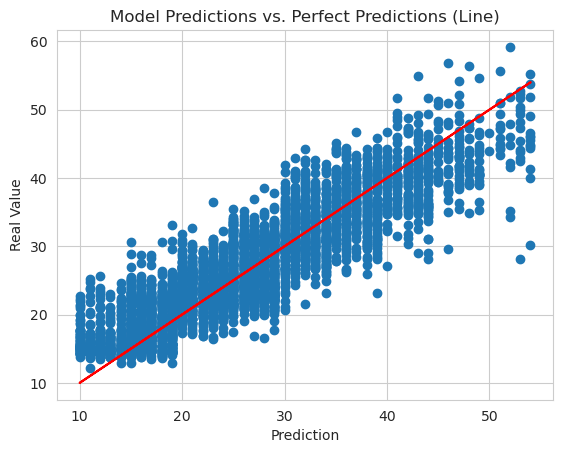

In [38]:
# Our predictions
plt.scatter(y_test, predictions)

# Perfect predictions
plt.plot(y_test, y_test, 'r')
plt.ylabel('Real Value')
plt.xlabel('Prediction')
plt.title('Model Predictions vs. Perfect Predictions (Line)');

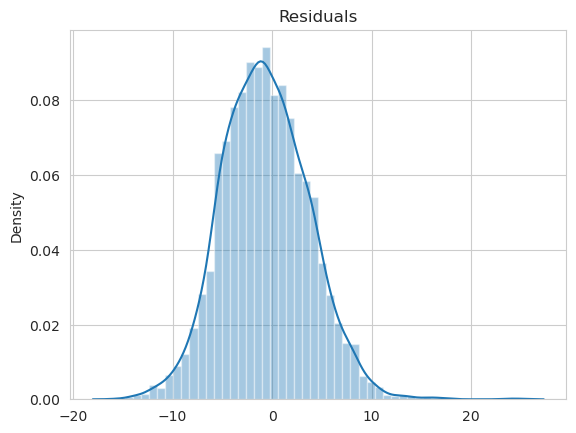

In [30]:
errors = y_test.values.reshape(4387, 1) - predictions
sns.distplot(errors)
plt.title('Residuals');

In [41]:
# Worst predictions
ComparationTable.sort_values(by = 'Difference %', ascending = False).head(10)

,Real Value,Model Prediction,Difference,Difference %
1705,10.0,23,-13.0,130.000000
975,11.0,25,-14.0,127.272727
2702,11.0,25,-14.0,127.272727
2910,10.0,22,-12.0,120.000000
3283,10.0,22,-12.0,120.000000
1323,11.0,24,-13.0,118.181818
527,11.0,24,-13.0,118.181818
1670,12.0,26,-14.0,116.666667
1828,10.0,21,-11.0,110.000000
3517,10.0,21,-11.0,110.000000


In [42]:
# Best predictions
ComparationTable.sort_values(by = 'Difference %', ascending = True).head(10)

,Real Value,Model Prediction,Difference,Difference %
2142,40.0,40,0.0,0.0
290,23.0,23,0.0,0.0
1775,19.0,19,0.0,0.0
1800,28.0,28,0.0,0.0
1813,31.0,31,0.0,0.0
1833,15.0,15,0.0,0.0
1854,23.0,23,0.0,0.0
1862,29.0,29,0.0,0.0
1886,20.0,20,0.0,0.0
1899,21.0,21,0.0,0.0


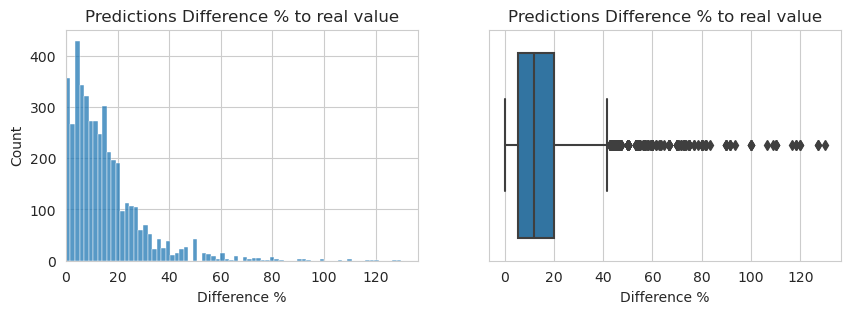

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))
sns.histplot(data = ComparationTable, x = 'Difference %', ax = ax1)
ax1.set_xlim(left = 0)
ax1.set_title('Predictions Difference % to real value')

sns.boxplot(data = ComparationTable, x = 'Difference %', ax = ax2)
ax2.set_title('Predictions Difference % to real value');

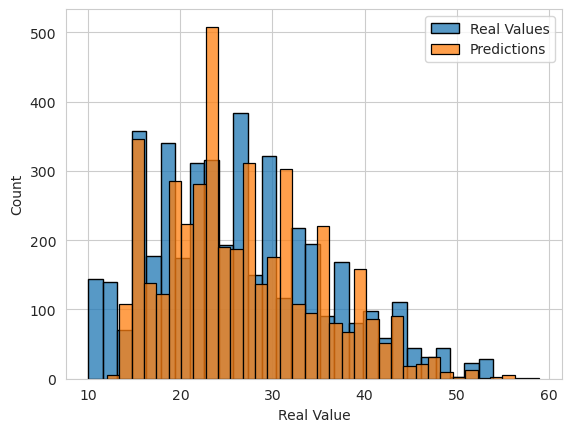

In [36]:
sns.histplot(data = ComparationTable, x = 'Real Value', label = 'Real Values', edgecolor = 'k')
sns.histplot(data = ComparationTable, x = 'Model Prediction', label = 'Predictions', edgecolor = 'k')
plt.legend();

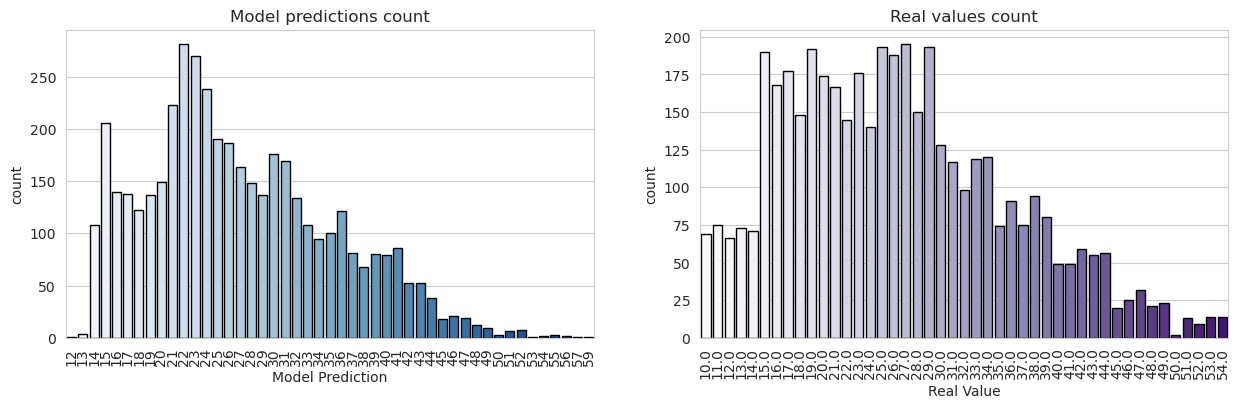

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1,figsize = (15, 4))
sns.countplot(data = ComparationTable, x = 'Model Prediction', ax = ax1, edgecolor = 'k', palette = 'Blues')
ax1.set_title('Model predictions count')
sns.countplot(data = ComparationTable, x = 'Real Value', ax = ax2, edgecolor = 'k', palette = 'Purples')
ax2.set_title('Real values count')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

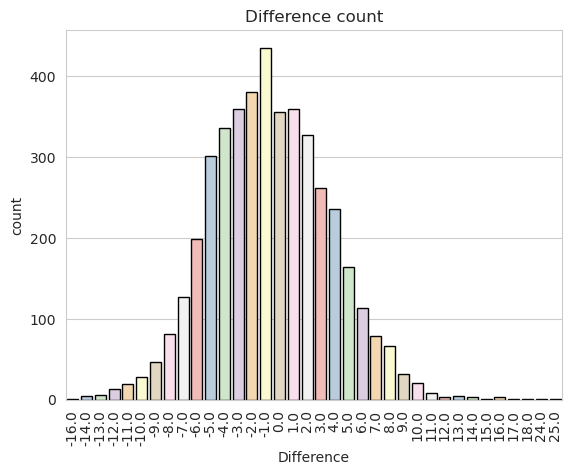

In [75]:
sns.countplot(data = ComparationTable, x = 'Difference', edgecolor = 'k', palette = 'Pastel1')
plt.xticks(rotation = 90)
plt.title('Difference count');

In [77]:
ComparationTable['Difference'].value_counts().to_frame().head(5)

,Difference
-1.0,435
-2.0,381
-3.0,360
1.0,360
0.0,356


**Model Training notes:**

- Model needed 20 epochs to be stopped due to avoid overfitting.
-  First model explained up to 0.78% of the data variance. 
-  Models Mean Absolute Error is about 3.50, RMSE about 4.38 and MSE 19.19
-  Error difference  mode is about 1 minute, having up to 75% of observations having an error difference equal or lower than 2 minutes..
-  Worst model prediction is 13 minutes of difference.
-  Best model predictions were spotted on! 0 minutes of difference.
- Distribution of predictions and Real values are pretty much the same.  

**Training notes:**

-  Model have an amazing having an average error of 1 minute